Lab | Customer Analysis Round 7

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

    use the concept of multicollinearity and remove insignificant variables
    use a different method of scaling the numerical variables
    use a different ratio of train test split
    use the transformation on numerical columns which align it more towards a normal distribution

Get the data

We are using the marketing_customer_analysis.csv file.
Dealing with the data

Already done in rounds 2 to 7.

Bonus: Build a function, from round 2 and round 7, to clean and process the data.
Explore the data

Done in the round 3.
Modeling

Description:

    Try to improve the linear regression model.


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"data_lab2.csv")

In [3]:
data2 = pd.read_csv(r"data_lab2.csv")

In [4]:
data.describe()

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,4566.500000,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,2636.903013,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2283.250000,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,4566.500000,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,6849.750000,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,9133.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9134 non-null   int64  
 1   customer                       9134 non-null   object 
 2   state                          9134 non-null   object 
 3   customer_lifetime_value        9134 non-null   float64
 4   response                       9134 non-null   object 
 5   coverage                       9134 non-null   object 
 6   education                      9134 non-null   object 
 7   effective_to_date              9134 non-null   object 
 8   employmentstatus               9134 non-null   object 
 9   gender                         9134 non-null   object 
 10  income                         9134 non-null   int64  
 11  location_code                  9134 non-null   object 
 12  marital_status                 9134 non-null   o

In [6]:
data_numeric = data.select_dtypes(exclude=['object'])

In [7]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9134 non-null   int64  
 1   customer_lifetime_value        9134 non-null   float64
 2   income                         9134 non-null   int64  
 3   monthly_premium_auto           9134 non-null   int64  
 4   months_since_last_claim        9134 non-null   int64  
 5   months_since_policy_inception  9134 non-null   int64  
 6   number_of_open_complaints      9134 non-null   int64  
 7   number_of_policies             9134 non-null   int64  
 8   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 642.4 KB


In [8]:
data_numeric.head()

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,2763.519279,56274,69,32,5,0,1,384.811147
1,1,6979.535903,0,94,13,42,0,8,1131.464935
2,2,12887.431650,48767,108,18,38,0,2,566.472247
3,3,7645.861827,0,106,18,65,0,7,529.881344
4,4,2813.692575,43836,73,12,44,0,1,138.130879


In [9]:
corr_data = data_numeric
correlations_matrix = corr_data.corr()
correlations_matrix

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Unnamed: 0,1.000000,0.014235,-0.013246,-0.002135,-0.001798,-0.003401,-0.003747,-0.012265,0.015671
customer_lifetime_value,0.014235,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,-0.013246,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,-0.002135,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,-0.001798,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,-0.003401,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.003747,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,-0.012265,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.015671,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [10]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

NameError: name 'plt' is not defined

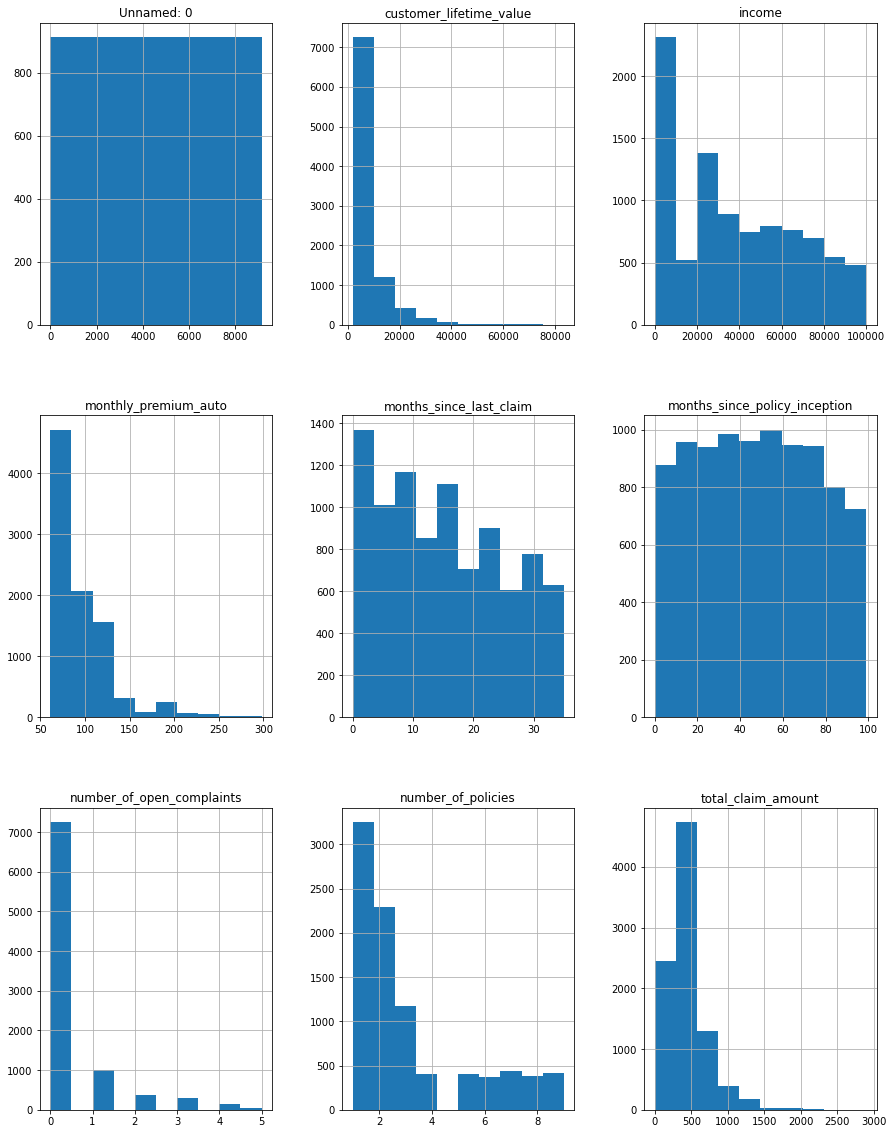

In [11]:
corr_data.hist(figsize = (15,20));

In [12]:
Ydata = corr_data['total_claim_amount']
data = corr_data.drop(['total_claim_amount'], axis=1)
Ydata

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

In [13]:
#add num data into a variable

X_num = corr_data.select_dtypes(include = np.number)



In [14]:
# normalize dataset

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
# normalize dataset


(9134, 9)


In [ ]:
#X = np.concatenate((x_normalized), axis=1)
X = np.array(x_normalized)
Y = Ydata

X.flatten()  #not working?

In [ ]:
X.shape  #still has columns

In [ ]:
Y.shape

In [ ]:
#do the split for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

In [ ]:
X_cat = data2.select_dtypes(include = np.object)
X_cat

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
# encoder.categories_
encoded = encoder.transform(X_cat).toarray()
encoded

In [ ]:
X_cat.shape

In [ ]:
X = np.concatenate((x_normalized, encoded), axis=1)
Y = Ydata

In [ ]:
#do the split for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [ ]:
#apply the machine learn model 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)